In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym
from sympy import integrate
from sympy import solveset
from sympy import Eq
from sympy import sympify

In [3]:
def radar_plot_values(values):
    N = len(values)
    A = sym.Symbol('A')
    B = sym.Symbol('B')
    n = sym.Symbol('n')
    t = sym.Symbol('t')
    x = sym.Symbol('x')
    values_1 = values + values[0:1]
    half = sym.Rational(1, 2)
    off=offset = half
    proportion = 7
    eq = sympify('(1 - (n*t*sqrt(1 - B)/(2*pi) - sqrt(1 - A)*(-n*t/(2*pi) + 1))**2)*(sqrt(-24*(2*sqrt(A)*sqrt(B)*sqrt(1 - A)*sqrt(1 - B) + 2*sqrt(A)*sqrt(B) + 2*A*B - A - B + 2*sqrt(1 - A)*sqrt(1 - B) + 2)*(pi*A**2 + pi*A*B + pi*A*sqrt(1 - A)*sqrt(1 - B) - 10*A + 2*pi*A + pi*B**2 + pi*B*sqrt(1 - A)*sqrt(1 - B) - 10*B + 2*pi*B + 3*pi*sqrt(1 - A)*sqrt(1 - B) + 3*pi) + pi*(3*A**(3/2)*sqrt(B) + 3*sqrt(A)*B**(3/2) + 4*sqrt(A)*sqrt(B)*sqrt(1 - A)*sqrt(1 - B) + 9*sqrt(A)*sqrt(B) + 4*A*B + 3*A*sqrt(1 - A)*sqrt(1 - B) - A + 3*B*sqrt(1 - A)*sqrt(1 - B) - B + 13*sqrt(1 - A)*sqrt(1 - B) + 13)**2)/(4*sqrt(pi)*(2*sqrt(A)*sqrt(B)*sqrt(1 - A)*sqrt(1 - B) + 2*sqrt(A)*sqrt(B) + 2*A*B - A - B + 2*sqrt(1 - A)*sqrt(1 - B) + 2)) + 1 - (3*A**(3/2)*sqrt(B) + 3*sqrt(A)*B**(3/2) + 4*sqrt(A)*sqrt(B)*sqrt(1 - A)*sqrt(1 - B) + 9*sqrt(A)*sqrt(B) + 4*A*B + 3*A*sqrt(1 - A)*sqrt(1 - B) - A + 3*B*sqrt(1 - A)*sqrt(1 - B) - B + 13*sqrt(1 - A)*sqrt(1 - B) + 13)/(4*(2*sqrt(A)*sqrt(B)*sqrt(1 - A)*sqrt(1 - B) + 2*sqrt(A)*sqrt(B) + 2*A*B - A - B + 2*sqrt(1 - A)*sqrt(1 - B) + 2))) + (-sqrt(A)*(-n*t/(2*pi) + 1) + sqrt(B)*n*t/(2*pi))**2*(-sqrt(-24*(2*sqrt(A)*sqrt(B)*sqrt(1 - A)*sqrt(1 - B) + 2*sqrt(A)*sqrt(B) + 2*A*B - A - B + 2*sqrt(1 - A)*sqrt(1 - B) + 2)*(pi*A**2 + pi*A*B + pi*A*sqrt(1 - A)*sqrt(1 - B) - 10*A + 2*pi*A + pi*B**2 + pi*B*sqrt(1 - A)*sqrt(1 - B) - 10*B + 2*pi*B + 3*pi*sqrt(1 - A)*sqrt(1 - B) + 3*pi) + pi*(3*A**(3/2)*sqrt(B) + 3*sqrt(A)*B**(3/2) + 4*sqrt(A)*sqrt(B)*sqrt(1 - A)*sqrt(1 - B) + 9*sqrt(A)*sqrt(B) + 4*A*B + 3*A*sqrt(1 - A)*sqrt(1 - B) - A + 3*B*sqrt(1 - A)*sqrt(1 - B) - B + 13*sqrt(1 - A)*sqrt(1 - B) + 13)**2)/(4*sqrt(pi)*(2*sqrt(A)*sqrt(B)*sqrt(1 - A)*sqrt(1 - B) + 2*sqrt(A)*sqrt(B) + 2*A*B - A - B + 2*sqrt(1 - A)*sqrt(1 - B) + 2)) + (3*A**(3/2)*sqrt(B) + 3*sqrt(A)*B**(3/2) + 4*sqrt(A)*sqrt(B)*sqrt(1 - A)*sqrt(1 - B) + 9*sqrt(A)*sqrt(B) + 4*A*B + 3*A*sqrt(1 - A)*sqrt(1 - B) - A + 3*B*sqrt(1 - A)*sqrt(1 - B) - B + 13*sqrt(1 - A)*sqrt(1 - B) + 13)/(4*(2*sqrt(A)*sqrt(B)*sqrt(1 - A)*sqrt(1 - B) + 2*sqrt(A)*sqrt(B) + 2*A*B - A - B + 2*sqrt(1 - A)*sqrt(1 - B) + 2))) + 1/2')
    H = eq.subs(n,N)
    X = [0]*N
    thetas = [0]*N
    radii = [0]*N  
    for i in range(N):
        X[i] = H.subs([(A,values[i]),(B,values_1[i+1]),(t,t-i*2*sym.pi/N)])
        thetas[i] = np.arange((i)*2*np.pi/N,(i+1)*2*np.pi/N,0.1*np.pi/N)
        radii[i] = np.arange((i)*2*np.pi/N,(i+1)*2*np.pi/N,0.1*np.pi/N)
    for i in range(N):
        for j in range(len(thetas[i])):
            radii[i][j] = X[i].subs(t,thetas[i][j]).evalf()
    theta = np.concatenate(thetas)
    radius = np.concatenate(radii)
    pi_2 = np.array([2*np.pi])
    theta = np.append(theta,pi_2)
    radius = np.append(radius,radius[0])
    return theta, radius

def upright_angle(angle):
    if (angle > 90) and (angle < 270):
        angle = angle + 180
    return angle
    
def radar_plot(percentiles, real_values = [], names = [], categories = [], background_colour = 'white',
               proportion = 4, offset = 0.5,colours = ['red','blue','green','black'],alphas = [.6,.5,.4,.3], title = '',
               notes = '',inter = False ):
    #special colorscheme
    if inter:
        colours =  [(0,0.43,0.72),(0.49,0.385,0.154),'red','blue']
        alphas = [.6,.5,.4,.3,.5,.4]  
    #number of categories
    n = len(percentiles[0]) # number of categories
    p = len(percentiles) # number of players
    #counter size
    off=offset
    #set up plot
    fig = plt.figure(figsize =(5, 10),dpi=300)
    fig.patch.set_facecolor(background_colour)
    ax = plt.subplot(111, projection='polar')
    ax.set_facecolor(background_colour)
    grey_1 = 0.84
    grey_2 = 0.87
    #label axes
    pos = [off,off+0.2,off+0.4,off+0.6,off+0.8,off+1] # Less radial ticks
    labs = [0,20,40,60,80,100]
    for i in range(n):
          for j in range (6):
              ax.annotate(labs[j], fontsize = 'xx-small',
                        xy=[i*2*np.pi/n,pos[j] ],xycoords='data',rotation = upright_angle(360*i/n),
                        ha="center", va="center",color = 'black',zorder = 25)
    #plot background for equal values in multiples of 0.2
    bw_colours = [(grey_1,grey_1,grey_1),(grey_2,grey_2,grey_2),(grey_1,grey_1,grey_1),
                  (grey_2,grey_2,grey_2),(grey_1,grey_1,grey_1),background_colour]
    zorders = [1,2,3,4,5,20]
    for i in range(len(bw_colours)):
        values = [1 - i*0.2]*n
        theta,radius = radar_plot_values(values)
        ax.plot(theta, radius,alpha=0)
        ax.fill_between(theta, radius,alpha = 1,color = bw_colours[i],lw=0,zorder = zorders[i])
    #plor each player
    for i in range(len(percentiles)):
        theta,radius = radar_plot_values(percentiles[i])
        ax.plot(theta, radius,alpha=0)
        ax.fill_between(theta, radius,alpha = alphas[i%len(alphas)], color = colours[i%len(percentiles)],lw=0,zorder = 5+i)
    ax.set_rmax(1.5+offset) #set overall size of plot
    ax.set_theta_zero_location("N") #first category at the top
    ax.set_rticks([])  # prevent automatic radial ticks
    ax.set_yticklabels([]) # prevent tiack around edge
    # ax.set_rlabel_position(0)  # Move radial labels away from plotted line
    ax.set_xticks([])
    ax.grid(False) # no grid
    ax.spines['polar'].set_visible(False) # no outer circle
    # type player names over central counter
    for i in range(len(names)):
        ax.annotate(names[i], 
                xy=[0.5,0.5 +0.03*(len(names)-1)- 0.06*i],xycoords='axes fraction',fontsize = 'small',
                ha="center", va="center",color = colours[i],zorder = 30)
    # category names around edge
    if real_values:
        cat_height = 1.25 # Higher to fit values
    else:
        cat_height = 1.15 # Can be lower
    if categories:   #only if categories not empty
        for i in range(n):
            ax.annotate(categories[i], fontsize = 'x-small',
                        xy=[i*2*np.pi/n,cat_height + offset ],xycoords='data',
                        rotation = upright_angle(360*i/n),
                        ha="center", va="center",color = 'black',zorder = 30)
    # alignments = [['center'],['right','left'],['right','center','left'],['right','center','center','left']] ## Was a bad idea for rotation reasons
    # percentile scores in little boxes at value on each axis
    for j in range(p):
        bbox_props = dict(boxstyle="round,pad=0.3", fc=background_colour, ec=colours[j], lw=0.5)
        for i in range(n):
            ax.annotate(str(round(percentiles[j][i]*100)), fontsize = 'xx-small',
                        xy=[i*2*np.pi/n +(1.6-percentiles[j][i])*(0.06*(p-1)-0.12*j),percentiles[j][i]+offset],
                        xycoords='data',
                        rotation = upright_angle(360*i/n),
                        ha=#alignments[p-1][j]
                        'center', va="center",color = colours[j],zorder = 30+i,bbox=bbox_props)
    # actual scores under category names
    if real_values:
        for j in range(p):
            for i in range(n):
                ax.annotate(str(real_values[j][i] if (1.0*real_values[j][i]).is_integer() else round(real_values[j][i],2)),
                            fontsize = 'xx-small',
                            xy=[i*2*np.pi/n + 0.08*(p-1) - 0.16*j,1.16 + offset + 0.0005*(p-1-2*j)**2 ],xycoords='data', # correction to a straight line
                            rotation = upright_angle(360*i/n),
                            ha=#alignments[p-1][j]
                            'center', va="center",color = colours[j],zorder = 30)
    
            
    # add note at bottom
    ax.annotate(notes, fontsize = 'xx-small',
                           xy=[.98,.01], xycoords='axes fraction',
                           ha="right", va="bottom",color = 'black',zorder = 30)
    # Add title
    ax.annotate(title, fontsize = 'medium',fontweight = 'bold',
                           xy=[.02,.98], xycoords='axes fraction',
                           ha="left", va="top",color = 'black' ,zorder = 30)
    #Add key
    key_height = .98
    ax.annotate('key:', fontsize = 'small',fontweight = 'bold',
                           xy=[.9,.98], xycoords='axes fraction',
                           ha="center", va="top",color = 'black',zorder = 30)
    key_height = key_height - 0.005
    if categories:
        key_height = key_height -0.03
        ax.annotate('Catergory', fontsize = 'x-small',
                           xy=[.9,key_height], xycoords='axes fraction',
                           ha="center", va="top",color = 'black',zorder = 30)
    if real_values:
        key_height = key_height -0.03
        ax.annotate('Value', fontsize = 'xx-small',
                           xy=[.9,key_height], xycoords='axes fraction',
                           ha="center", va="top",color = colours[0],zorder = 30)
    bbox_props = dict(boxstyle="round,pad=0.3", fc=background_colour, ec=colours[0], lw=0.5)
    key_height = key_height -0.035
    ax.annotate('percentile', fontsize = 'xx-small',
                        xy=[.9,key_height], xycoords='axes fraction',
                        ha="center", va="top",color = colours[0],zorder = 30,
                        bbox=bbox_props)
    return fig


## EXAMPLE

# if using from another file:
    # from radar_plaottes import radar_plot

# percentiles = [[.75,.12,.33,.92,.81,.67],[.34,.17,.55,.41,.27,.64]]
# fig1 = radar_plot(percentiles,
#                     real_values = [[1,2,3.3333,4,5,6,7],[1,2,3.33333,4,5,6,7]],
#                     names = ['Equal','Area'],
#                     categories = ['cat1','cat2','cat3','cat4','cat5','cat6','cat7','cat8'],
#                     inter = True,
#                     notes = 'All values per 90 minutes',
#                     title = 'Attacker')


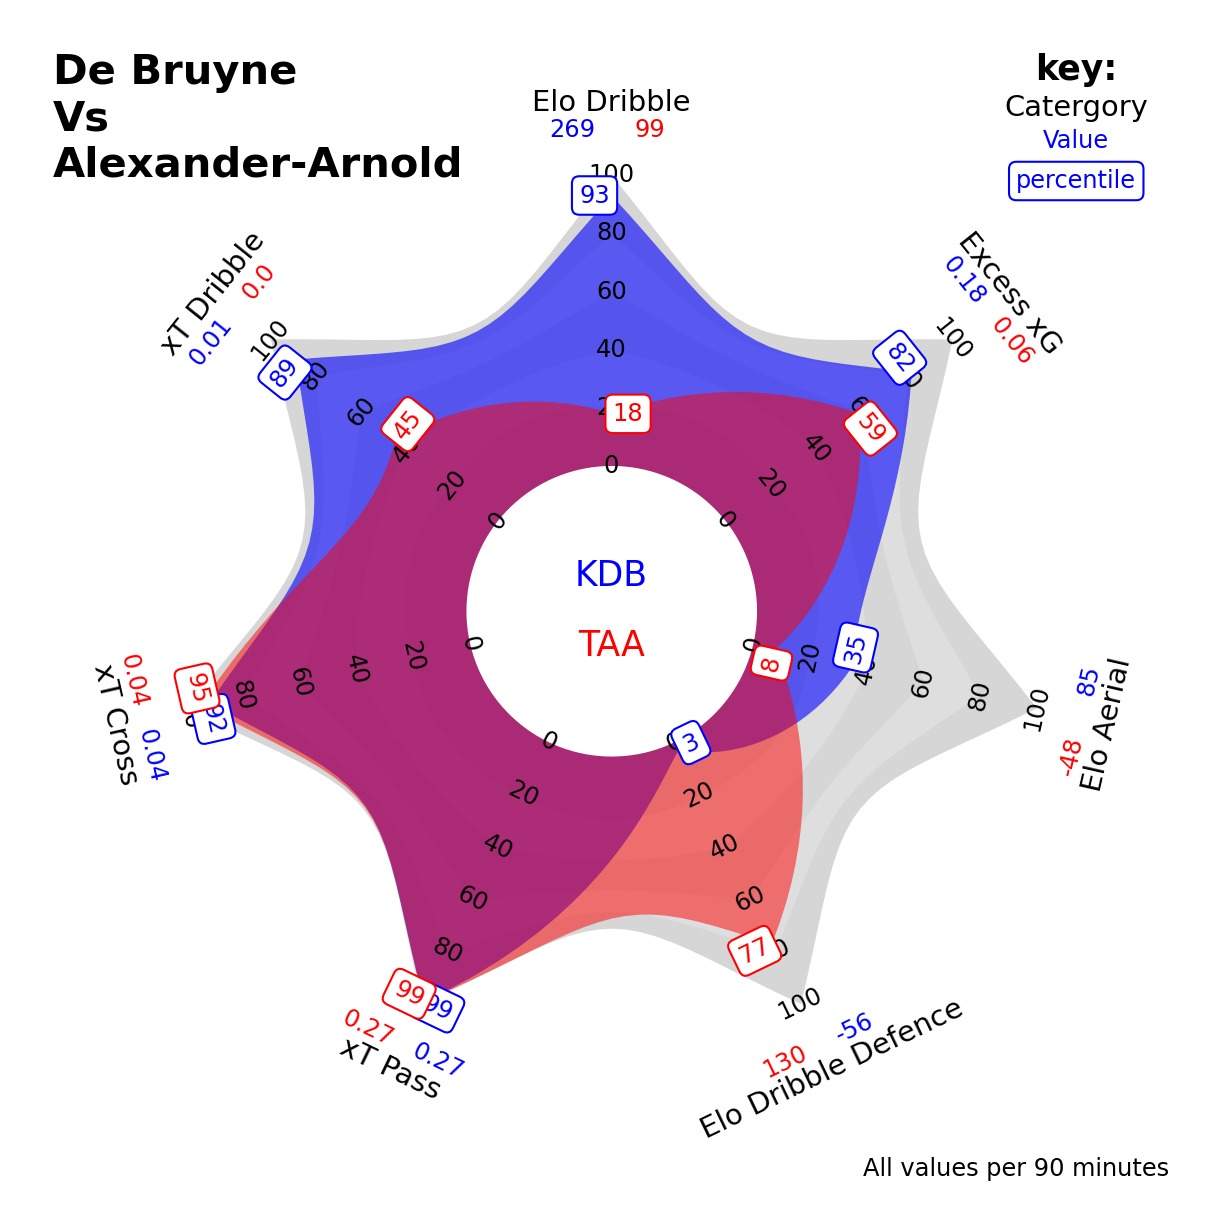

In [32]:
percentiles = [[.93,.89,.92,.99,.03,.35,.82],[.18,.45,.95,.99,.77,.08,.59]]
fig1 = radar_plot(percentiles,
                     real_values = [[269,0.01,0.04,0.27,-56,85,0.18],[99,0.001,0.04,0.27,130,-48,0.06]],
                     names = ['KDB','TAA'],
                     categories = ['Elo Dribble','xT Dribble','xT Cross','xT Pass','Elo Dribble Defence','Elo Aerial','Excess xG'],
                     inter = False,
                     colours = ['blue','red'],
                     alphas = [0.6, 0.5],
                     notes = 'All values per 90 minutes',
                     title = 'De Bruyne\nVs\nAlexander-Arnold')

In [33]:
fig1.savefig('/Users/christian/Desktop/University/Birkbeck MSc Applied Statistics/Project/Plots/Player xT/KDBvsTAA.png', transparent=True, dpi=300, bbox_inches='tight')

## Kane Replacement

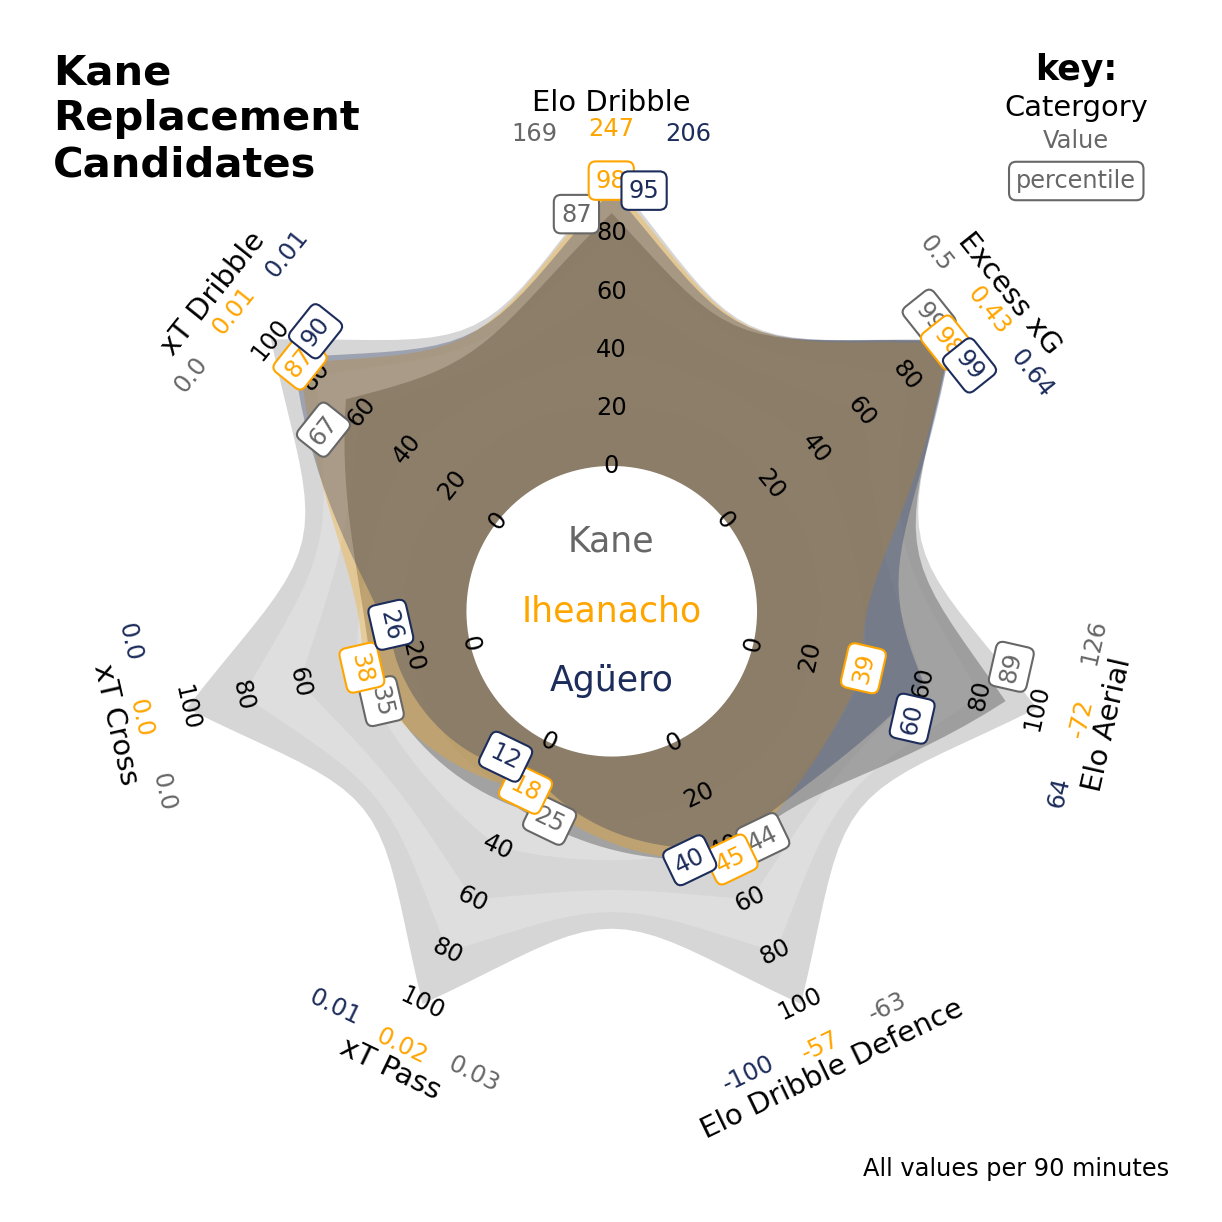

In [66]:
percentiles =  [[.87,.67,.35,.25,.44,.89,.99]\
               ,[.98,.87,.38,.18,.45,.39,.98]\
               #,[.81,.54,.37,.16,.45,.42,.99]\
               ,[.95,.90,.26,.12,.40,.60,.994]]

real_values = [[169,0.004,0.003,0.03,-63,126,0.50]\
                ,[247,0.009,0.003,0.02,-57,-72,0.43]\
                #,[149,0.002,0.003,0.02,-50,-20,0.46]\
                ,[206,0.01,0.0001,0.01,-100,64,0.64]]

fig2 = radar_plot(percentiles,
                 real_values,
                 names = ['Kane','Iheanacho','Agüero'],
                 categories = ['Elo Dribble','xT Dribble','xT Cross','xT Pass','Elo Dribble Defence','Elo Aerial','Excess xG'],
                 inter = False,
                 colours = ['#676767','orange','#1C2C5B'],
                 alphas = [0.5, 0.3, 0.3],
                 notes = 'All values per 90 minutes',
                 title = 'Kane\nReplacement\nCandidates')

In [67]:
fig2.savefig('/Users/christian/Desktop/University/Birkbeck MSc Applied Statistics/Project/Plots/Player xT/KaneReplacement.png', transparent=True, dpi=300, bbox_inches='tight')

## Marcus Rashford Vs Greenwood & James 2020/21

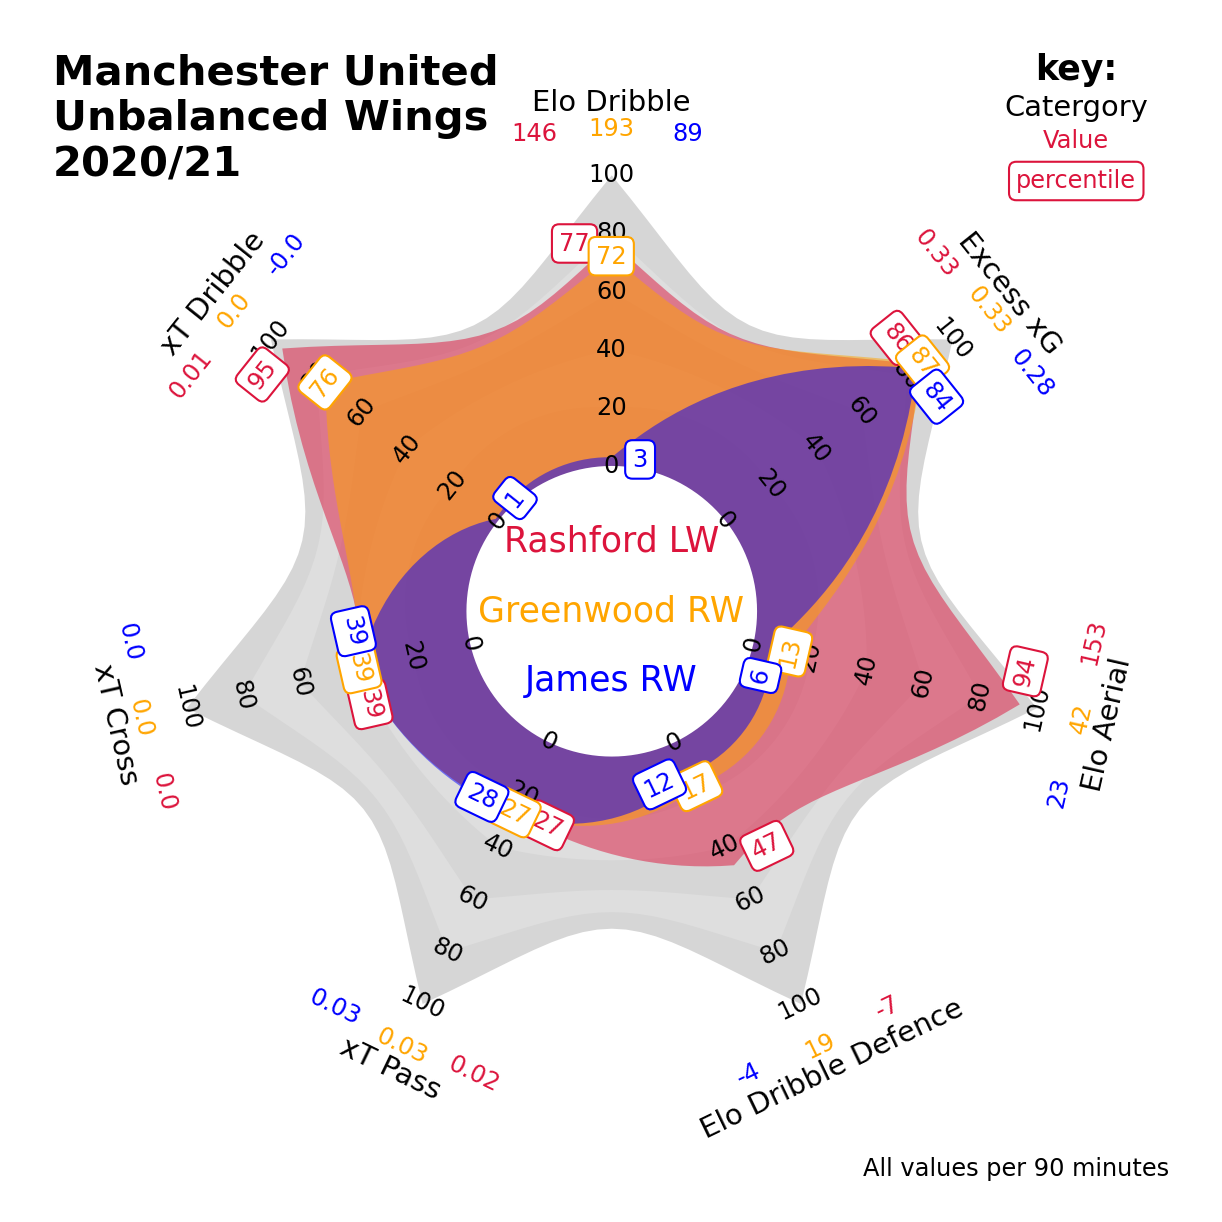

In [77]:
percentiles =  [[.77,.95,.39,.27,.47,.94,.86]\
               ,[.72,.76,.39,.27,.17,.13,.87]\
               ,[.03,.01,.39,.28,.12,.06,.84]]

real_values =   [[146,0.01,0.0002,0.02,-7,153,0.33]\
                ,[193,0.003,0.002,0.03,19,42,0.33]\
                ,[89,-0.002,0.003,0.03,-4,23,0.28]]

fig3 = radar_plot(percentiles,
                 real_values,
                 names = ['Rashford LW','Greenwood RW','James RW'],
                 categories = ['Elo Dribble','xT Dribble','xT Cross','xT Pass','Elo Dribble Defence','Elo Aerial','Excess xG'],
                 inter = False,
                 colours = ['crimson','orange','blue'],
                 alphas = [0.5, 0.5, 0.5],
                 notes = 'All values per 90 minutes',
                 title = 'Manchester United\nUnbalanced Wings\n2020/21')

In [78]:
fig3.savefig('/Users/christian/Desktop/University/Birkbeck MSc Applied Statistics/Project/Plots/Player xT/UnitedWingers.png', transparent=True, dpi=300, bbox_inches='tight')